In [45]:
##Project P462: Model Building (updated with Best score -Hierrachy silhoutee :0.96)


In [46]:
# We need to Import all the  necessary libraries :
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# And Loading our the dataset:
c = pd.read_csv('World_development_mesurement.csv')



In [47]:
# checking for missing values
print("Missing Values Count:")
print(c.isnull().sum())


Missing Values Count:
Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64


In [48]:
# Missing values are not getting 0 f

In [49]:

# Separating the numerical columns from categorical columns
numerical_cols = c.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = c.select_dtypes(include=['object']).columns



In [50]:
# Converting 'GDP' column to float bcz 'GDP' column needs to be in a suitable format for numerical analysi
c['GDP'] = c['GDP'].str.replace('$', '').str.replace(',', '').astype(float)

In [51]:

# Imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
c[numerical_cols] = imputer.fit_transform(c[numerical_cols])
c[categorical_cols] = c[categorical_cols].fillna(c[categorical_cols].mode().iloc[0])


In [52]:

# Selecting these features bcz these features have more complete and accurate data compared to other features as the dimensionality of the data
# is reduced, making it easier to analyze and visualize.
features = c[['GDP', 'CO2 Emissions', 'Energy Usage', 'Internet Usage']]

In [53]:

# Normalizing the features using StandardScaler to prevent large ranged features dominancy and to improve the model performance
standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)


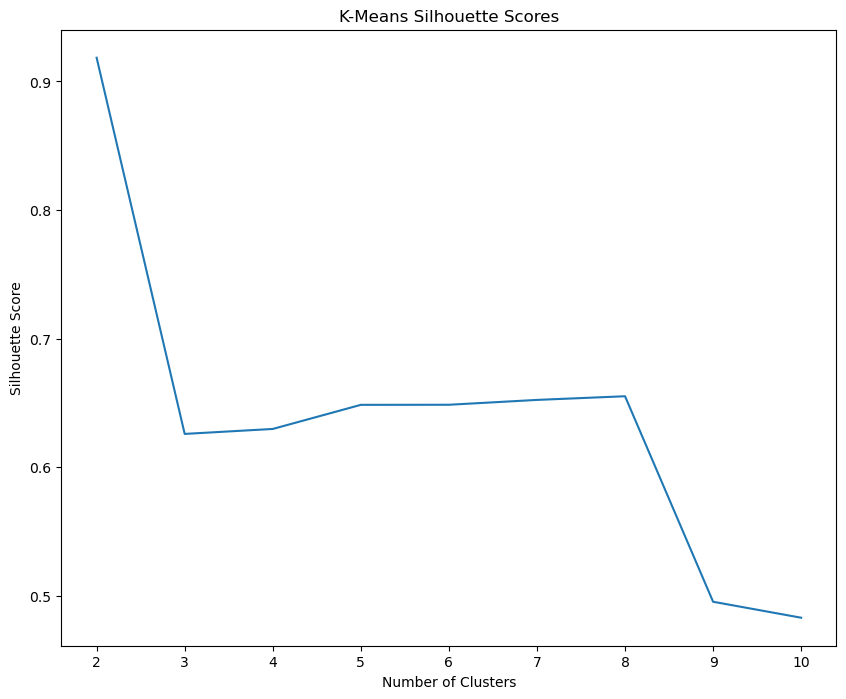

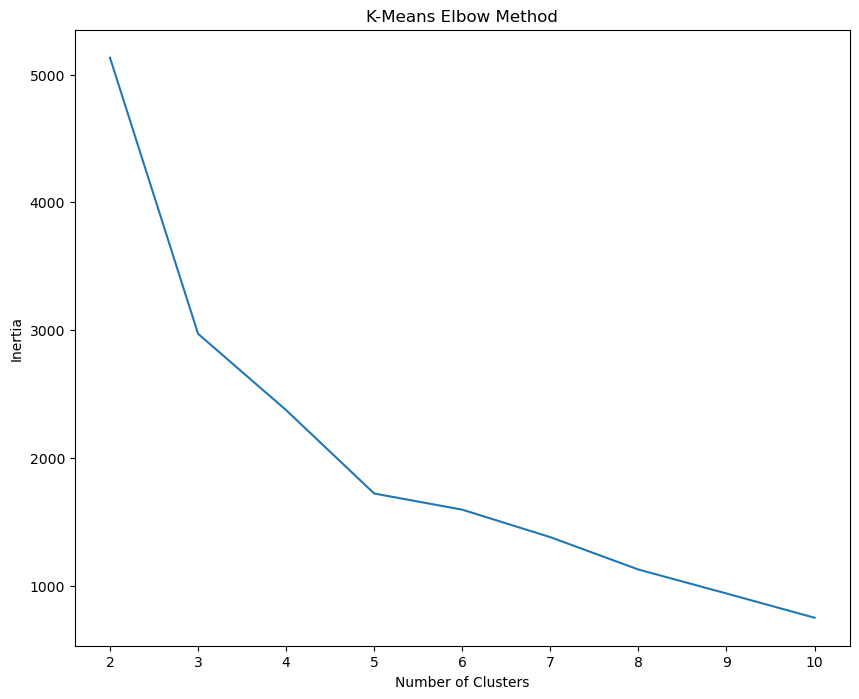

In [54]:

#Applying K Means clustering to the standardized features and also to evaluate the clustering performance 
# using elbow and silhouttee score;

# K-Means Clustering
kmeans_silhouette_scores = []
kmeans_clusters = []
kmeans_inertia = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features_standardized)
    silhouette_avg = silhouette_score(features_standardized, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_avg)
    kmeans_clusters.append(cluster_labels)
    kmeans_inertia.append(kmeans.inertia_)

# Plot K-Means Clustering
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), kmeans_silhouette_scores)
plt.title("K-Means Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Plot K-Means Elbow Method
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), kmeans_inertia)
plt.title("K-Means Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


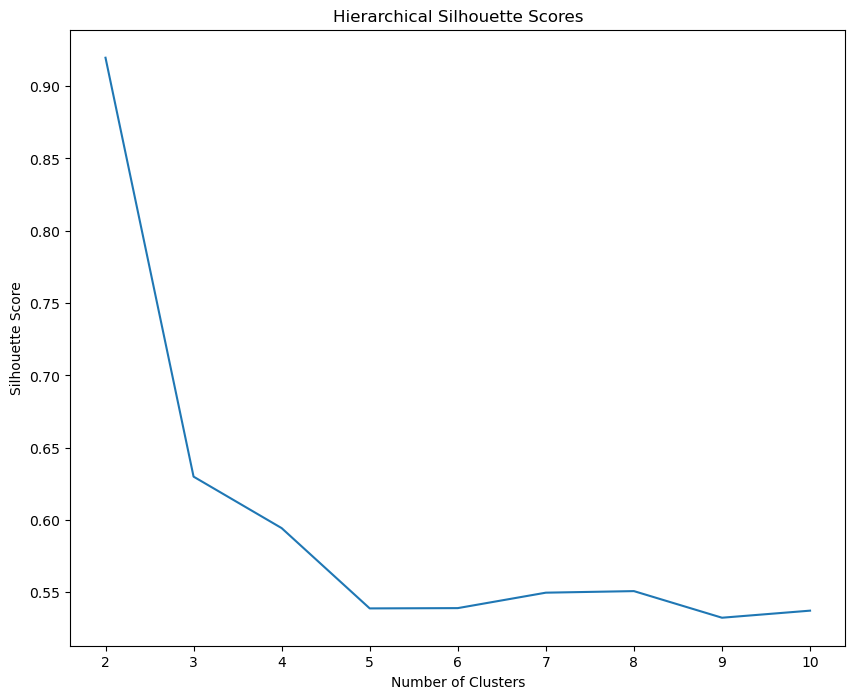

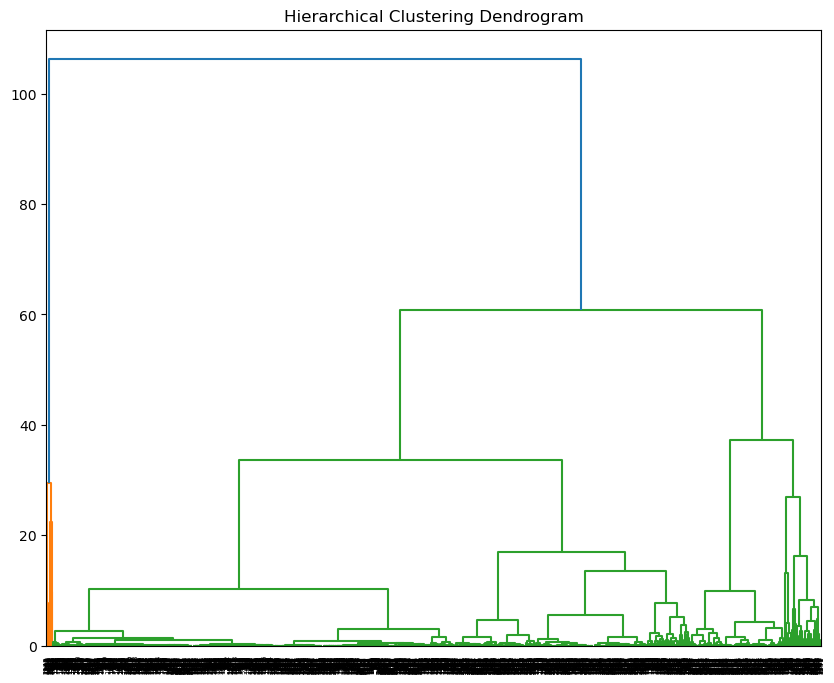

In [55]:

# Hierarchical Clustering using dendrogram to visualize
hclust_silhouette_scores = []
hclust_clusters = []
hclust_inertia = []
for n_clusters in range(2, 11):
    hclust = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hclust.fit_predict(features_standardized)
    silhouette_avg = silhouette_score(features_standardized, cluster_labels)
    hclust_silhouette_scores.append(silhouette_avg)
    hclust_clusters.append(cluster_labels)
    # Note: AgglomerativeClustering does not have an inertia_ attribute
    # We will use the silhouette scores instead

# Plot Hierarchical Clustering Silhouette Scores
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), hclust_silhouette_scores)
plt.title("Hierarchical Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Plot Hierarchical Clustering Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(features_standardized, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()



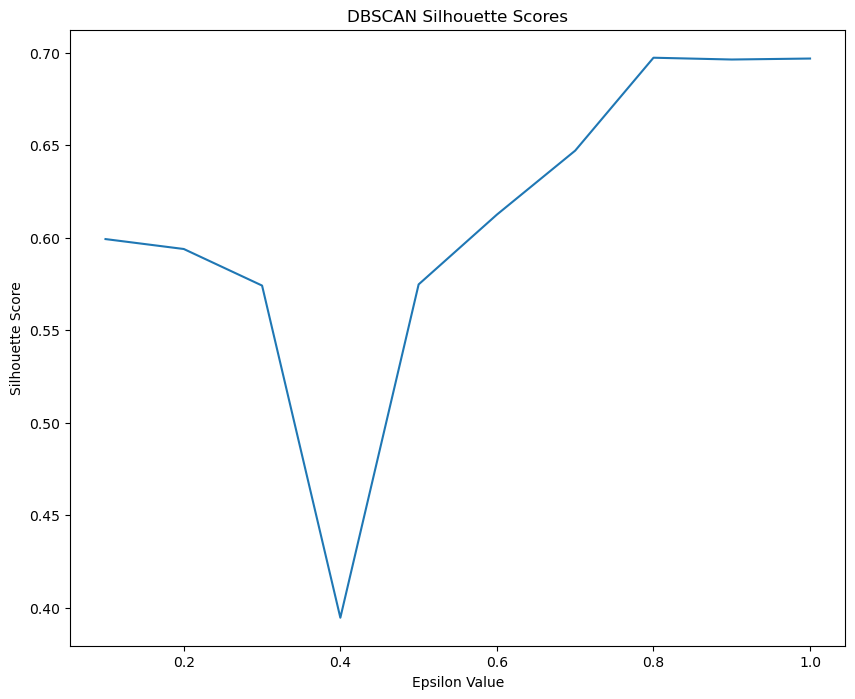

In [56]:

# DBSCAN Clustering
dbscan_silhouette_scores = []
dbscan_clusters = []
epsilons = np.arange(0.1, 1.1, 0.1)
for epsilon in epsilons:
    dbscan = DBSCAN(eps=epsilon, min_samples=5)
    cluster_labels = dbscan.fit_predict(features_standardized)
    silhouette_avg = silhouette_score(features_standardized, cluster_labels)
    dbscan_silhouette_scores.append(silhouette_avg)
    dbscan_clusters.append(cluster_labels)

# Plot DBSCAN Silhouette Scores
plt.figure(figsize=(10, 8))
plt.plot(epsilons, dbscan_silhouette_scores)
plt.title("DBSCAN Silhouette Scores")
plt.xlabel("Epsilon Value")
plt.ylabel("Silhouette Score")
plt.show()

#The plot shows how the clustering performance changes as the epsilon value increases.
# the epsilon value shows results in the highest silhouette score, indicating the best clustering result.


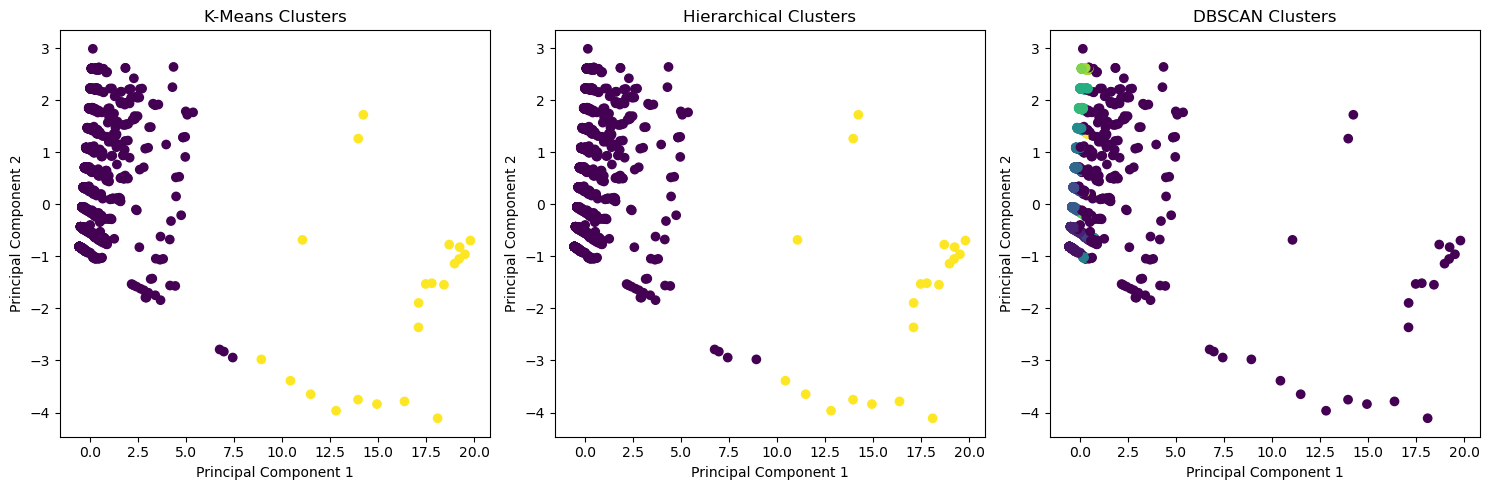

In [57]:

# Reduce dimensionality using PCA 
# And This PCA helps to See how the data points are grouped into clusters by each algorithm and also to compare the performance of each algorithm 
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_standardized)

# Plot clusters using PCA
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_clusters[0])
axs[0].set_title("K-Means Clusters")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")

axs[1].scatter(features_pca[:, 0], features_pca[:, 1], c=hclust_clusters[0])
axs[1].set_title("Hierarchical Clusters")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")

axs[2].scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_clusters[0])
axs[2].set_title("DBSCAN Clusters")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()



In [58]:
# Calculate the best silhouette score for each algorithm, 
# and on these silhouette scores we can determine the best model based on the highest silhouette score(more than .075)
kmeans_best_score = max(kmeans_silhouette_scores)
hclust_best_score = max(hclust_silhouette_scores)
dbscan_best_score = max(dbscan_silhouette_scores)

# Print the results
print(f"KMeans Silhouette Score: {kmeans_best_score:.4f}")

print(f"Hierarchical Silhouette Score: {hclust_best_score:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_best_score:.4f}")

# Determine the best model
best_model = max([kmeans_best_score, hclust_best_score, dbscan_best_score])
if best_model == kmeans_best_score:
    print(f"Best Model: KMeans with silhoutee score :{kmeans_best_score:.4f}")
elif best_model == hclust_best_score:
    print(f"Best Model: Hierarchical with silhouette score:{hclust_best_score:.4f}")
else:
    print(f"Best Model: DBSCAN with silhouttee score :{dbscan_best_score:.4f}")


KMeans Silhouette Score: 0.9184
Hierarchical Silhouette Score: 0.9196
DBSCAN Silhouette Score: 0.6972
Best Model: Hierarchical with silhouette score:0.9196
